<a href="https://colab.research.google.com/github/LeenaReddy18/Python_practice/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files, drive

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


* Go to your account, Scroll to API section and Click Expire API Token to remove previous tokens

* Click on Create New API Token - It will download kaggle.json file on your machine.

In [ ]:
mkdir TomatoLeafDisease

In [ ]:
cd TomatoLeafDisease

/content/TomatoLeafDisease


In [ ]:
# Install the 'kaggle' Python package to interact with Kaggle from within the Colab environment.
# The '!pip' indicates that this is a shell command to be executed in the colab environment.
!pip install kaggle

# Create a directory named '~' in the current directory (Colab environment).
# The 'mkdir' is a shell command to create a new directory.
!mkdir ~

# Upload the 'kaggle.json' file to the '~' directory.
# The 'files.upload()' is a command in Colab to upload files from the local machine to the current environment.
# After executing this command, you will be prompted to select the 'kaggle.json' file from your local machine.
files.upload()

# Create a directory named '.kaggle' in the user's home directory (~) of the Colab environment.
# The 'mkdir' is a shell command to create a new directory.
!mkdir ~/.kaggle

# Copy the 'kaggle.json' file from the '~' directory to the '.kaggle' directory.
# The 'cp' is a shell command to copy files.
# The 'kaggle.json' file contains the Kaggle API credentials necessary to use the Kaggle API.
!cp kaggle.json ~/.kaggle/

# Set the appropriate permissions (chmod) for the 'kaggle.json' file to protect sensitive credentials.
# The 'chmod' is a shell command to change file permissions.
# The '600' sets read and write permissions for the owner (you) while restricting access to others.
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root’: File exists


Saving kaggle.json to kaggle.json


In [ ]:
# Download the dataset from Kaggle with the specified dataset ID using the Kaggle API.
# The '-d' flag specifies the dataset ID ('shaikhshoeb/tomoto-plant-disease' in this case).
!kaggle datasets download -d shaikhshoeb/tomoto-plant-disease

# Unzip the downloaded 'tomoto-plant-disease.zip' file and extract its contents to the 'dataset' directory.
# The '-d' flag specifies the target directory for extraction ('dataset' in this case).
!unzip tomoto-plant-disease.zip -d dataset

# Move the contents of the 'plant disease' subdirectory (extracted from the zip) to the 'dataset' directory.
# The './dataset/plant\ disease/*' represents the source directory and its contents.
# The './dataset' represents the destination directory where the files are to be moved.
# The '\ ' is used to escape the space in the directory name ('plant disease') in the shell command.
!mv ./dataset/plant\ disease/* ./dataset

# Remove the now empty 'plant disease' subdirectory from the 'dataset' directory.
# The './dataset/plant\ disease' represents the directory to be removed.
!rmdir ./dataset/plant\ disease

Streaming output truncated to the last 5000 lines.
  inflating: dataset/plant disease/Tomato_Septoria_leaf_spot/0751ddb1-c3ee-46ee-bee1-46c24c567dc2___Matt.S_CG 6116.JPG  
  inflating: dataset/plant disease/Tomato_Septoria_leaf_spot/07679a50-9d8d-4612-80f4-464785781d56___JR_Sept.L.S 2727.JPG  
  inflating: dataset/plant disease/Tomato_Septoria_leaf_spot/076b6071-1ce2-4ed1-9dcf-077dcd7640e4___JR_Sept.L.S 2468.JPG  
  inflating: dataset/plant disease/Tomato_Septoria_leaf_spot/07a4190c-b0c0-4e03-9ad5-474938c837d2___Matt.S_CG 1242.JPG  
  inflating: dataset/plant disease/Tomato_Septoria_leaf_spot/07dd57ec-cbf0-4fc1-b680-6b3226da51e4___JR_Sept.L.S 8524.JPG  
  inflating: dataset/plant disease/Tomato_Septoria_leaf_spot/07e5a836-f1d6-4fc3-8847-09c8f9c368ec___Matt.S_CG 6089.JPG  
  inflating: dataset/plant disease/Tomato_Septoria_leaf_spot/0806cabf-f026-43bd-a508-0e8e5a185341___Matt.S_CG 1266.JPG  
  inflating: dataset/plant disease/Tomato_Septoria_leaf_spot/08233234-a3af-4040-8814-eb13f89802d

In [ ]:
import os
import random
import shutil
import uuid  # Import the uuid module to generate UUIDs

TRAIN_TO_VALIDATION_RATIO = 0.8  # 80% as training data and 20% as validation data
DATASET_DIR = os.path.join(os.getcwd(), 'dataset')
assert TRAIN_TO_VALIDATION_RATIO < 1.0, "Invalid 'TRAIN_TO_VALIDATION_RATIO', it should be between 0 and 1"

# create a 'tomato_leaf_disease' directory to save the 'train' and 'valid' data folders
os.makedirs(os.path.join(os.getcwd(), 'tomato_leaf_disease'))

# Create directories for train and validation sets
train_dir = os.path.join(os.getcwd(), 'tomato_leaf_disease', 'train')
valid_dir = os.path.join(os.getcwd(), 'tomato_leaf_disease', 'val')
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)

# Get a list of all class folders in the dataset directory
class_folders = [folder for folder in os.listdir(DATASET_DIR) if os.path.isdir(os.path.join(DATASET_DIR, folder))]

# Loop through each class folder
for class_folder in class_folders:
    class_path = os.path.join(DATASET_DIR, class_folder)

    # Get a list of images in the current class folder
    images = [image for image in os.listdir(class_path) if image.lower().endswith('.jpg') or image.lower().endswith('.png')]
    num_images = len(images)
    print(f"Number of images in '{class_folder}' are {num_images}.")

    # Calculate the number of images to be used for training and validation based on the given ratio
    num_train_images = int(TRAIN_TO_VALIDATION_RATIO * num_images)

    # Randomly shuffle the images to ensure random selection for train and validation sets
    random.shuffle(images)

    # Split images into train and validation sets
    train_images = images[:num_train_images]
    test_images = images[num_train_images:]

    # Move images to their respective directories with UUID-based names
    for image in train_images:
        src_path = os.path.join(class_path, image)
        unique_name = str(uuid.uuid4()) + os.path.splitext(image)[1]  # Generate a UUID and append the original file extension
        dst_path = os.path.join(train_dir, class_folder, unique_name)
        os.makedirs(os.path.join(train_dir, class_folder), exist_ok=True)  # Create class folder in train_dir if it doesn't exist
        shutil.copy(src_path, dst_path)  # Copy the image to the train directory with the new UUID-based name

    for image in test_images:
        src_path = os.path.join(class_path, image)
        unique_name = str(uuid.uuid4()) + os.path.splitext(image)[1]  # Generate a UUID and append the original file extension
        dst_path = os.path.join(valid_dir, class_folder, unique_name)
        os.makedirs(os.path.join(valid_dir, class_folder), exist_ok=True)  # Create class folder in valid_dir if it doesn't exist
        shutil.copy(src_path, dst_path)  # Copy the image to the validation directory with the new UUID-based name

    # Verify the total number of images after the split to ensure no data loss
    images_in_train = [image for image in os.listdir(os.path.join(train_dir, class_folder)) if
                       image.lower().endswith('.jpg') or image.lower().endswith('.png')]
    images_in_test = [image for image in os.listdir(os.path.join(valid_dir, class_folder)) if
                      image.lower().endswith('.jpg') or image.lower().endswith('.png')]
    final_total_images = len(images_in_train) + len(images_in_test)
    assert final_total_images == num_images, "After Splitting the number of images have decreased."

    print(f"Successfully processed '{class_folder}' class having a total of {final_total_images} images.")

Number of images in 'Tomato_Leaf_Mold' are 952.
Successfully processed 'Tomato_Leaf_Mold' class having a total of 952 images.
Number of images in 'Tomato_healthy' are 1591.
Successfully processed 'Tomato_healthy' class having a total of 1591 images.
Number of images in 'Tomato_Bacterial_spot' are 2127.
Successfully processed 'Tomato_Bacterial_spot' class having a total of 2127 images.
Number of images in 'Tomato_Septoria_leaf_spot' are 1771.
Successfully processed 'Tomato_Septoria_leaf_spot' class having a total of 1771 images.
Number of images in 'Tomato_Early_blight' are 1000.
Successfully processed 'Tomato_Early_blight' class having a total of 1000 images.
Number of images in 'Tomato_Late_blight' are 1908.
Successfully processed 'Tomato_Late_blight' class having a total of 1908 images.
Number of images in 'Tomato_Spider_mites_Two_spotted_spider_mite' are 1676.
Successfully processed 'Tomato_Spider_mites_Two_spotted_spider_mite' class having a total of 1676 images.


In [ ]:
!pip install ultralytics==8.0.140

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.6/606.6 kB 5.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
from IPython.display import display, Image

model = YOLO('yolov8n-cls.pt')
model.train(data = os.path.join(os.getcwd(), 'tomato_leaf_disease'), epochs=5, imgsz=128)

100%|██████████| 5.28M/5.28M [00:00<00:00, 130MB/s]
New https://pypi.org/project/ultralytics/8.0.142 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.140 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/TomatoLeafDisease/tomato_leaf_disease, epochs=5, patience=50, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_widt

In [ ]:
import pandas as pd

results_filename = os.path.join(os.getcwd(), 'runs', 'classify', 'train', 'results.csv')

df = pd.read_csv(results_filename)

# Display the first 5 rows of the training metrics.
display(df.head())

,epoch,train/loss,metrics/accuracy_top1,metrics/accuracy_top5,val/loss,lr/pg0,lr/pg1,lr/pg2
0,0,0.22903,0.92531,0.99955,0.62943,0.000238,0.000238,0.000238
1,1,0.05864,0.96062,0.99955,0.60605,0.000381,0.000381,0.000381
2,2,0.03927,0.97601,1.00000,0.59412,0.000431,0.000431,0.000431
3,3,0.02534,0.98506,1.00000,0.58820,0.000290,0.000290,0.000290
4,4,0.02015,0.98551,1.00000,0.58556,0.000290,0.000290,0.000290


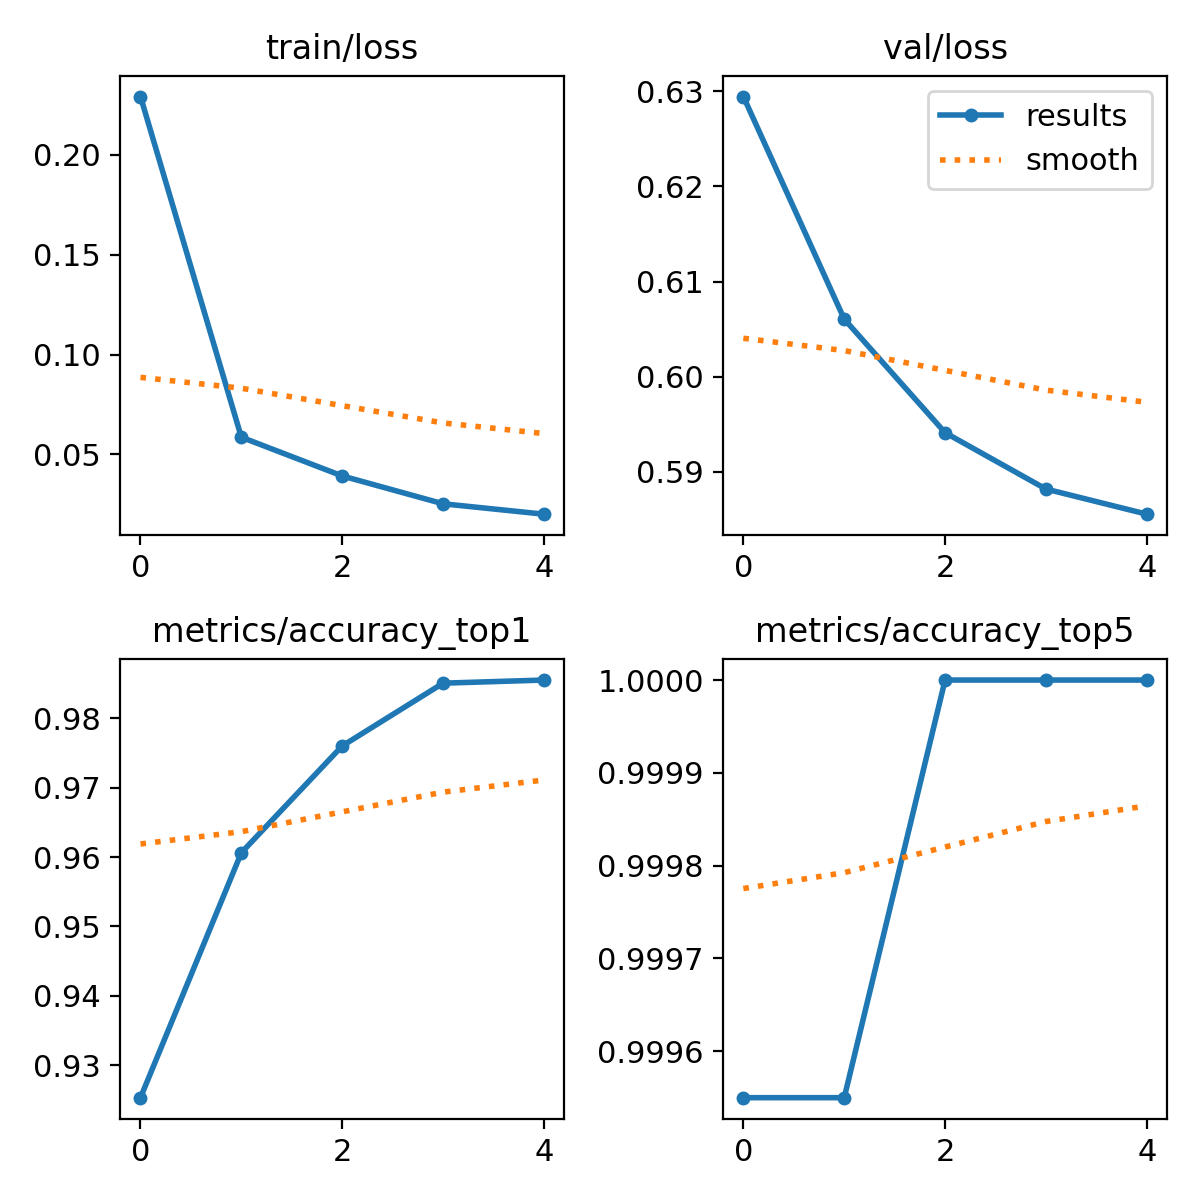

In [ ]:
# Display the first 5 rows of the training metrics.
display(Image(os.path.join(os.getcwd(), 'runs', 'classify', 'train', 'results.png')))

In [ ]:
validation_metrics = model.val(data = os.path.join(os.getcwd(), 'tomato_leaf_disease'),
                               model = os.path.join(os.getcwd(), 'runs', 'classify', 'train', 'weights', 'best.pt'))
print(f"Accuracy of the model is {validation_metrics.results_dict['metrics/accuracy_top1'] * 100:.2f}% on the validation dataset.")

Ultralytics YOLOv8.0.140 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
               classes   top1_acc   top5_acc: 100%|██████████| 139/139 [00:06<00:00, 22.96it/s]
                   all      0.985          1
Speed: 0.1ms preprocess, 0.7ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/val3


Accuracy of the model is 98.51% on the validation dataset.


In [ ]:
cdcdcdcdcdcdcdcdcdcdcdcdcdcdcdcdcdcdcdcdcdcdcdcdcdcdcdcdcdcdcdcdcdcdcdcd ..

In [ ]:
-rm -r-r Tom-rTom-ratoTomatoLeafDiseasTom-rTom-ratoTomatoLeafDiseasatoTomatoLeafDiseaatoTomatoLeafDisease